# Гора Кирилл Алексеевич
## 1 вариант
### Задание: Titanic
1. Определите количество мужчин и женщин, которые ехали на корабле.
2. Определите какой части пассажиров удалось выжить. Посчитайте долю выживших пассажиров. 
3. Какую долю пассажиры первого класса составляли среди всех пассажиров?
4. Какого возраста были пассажиры? Посчитайте среднее и медиану возраста пассажиров. 
5. Коррелируют ли число братьев/сестер с числом родителей/детей? Посчитайте корреляцию Пирсона между признаками SibSp и Parch. Оцените значение p-value. Постройте плотность распределения признаков SibSp и Parch.
6. Какое самое популярное женское имя на корабле? Извлеките из полного имени пассажира (колонка Name) его личное имя (First Name). Попробуйте вручную разобрать несколько значений столбца Name и выработать правило для извлечения имен, а также разделения их на женские и мужские.
7. Коррелирует ли класс, которым ехал пассажир, с выживаемостью?
8. Визуализируйте гистограммы возраста для выживших и не выживших пассажиров. Сделайте выводы. Отобразите данные на одном и нескольких графиках
9. Визуализируйте гистограммы возраста для выживших и не выживших пассажиров по классам. Сделайте выводы. 
10. Постройте столбчатую диаграмму количества людей: мужчины, женщины, дети.


In [217]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [134]:
data_titanic = pd.read_csv('titanic.csv')
print (data_titanic.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


### 1. Колличество на корабле:
#### мужчин

In [135]:
data_titanic[(data_titanic['Sex']=='male')].shape[0]

577

#### женщин

In [136]:
data_titanic[(data_titanic['Sex']=='female')].shape[0]

314

### 2. Колличество пассажиров, которые выжили

In [137]:
data_titanic_survived = pd.read_csv('gender_submission.csv')
data_titanic_survived [(data_titanic_survived['Survived'] ==  True)].shape[0]

152

#### Доля выживших пассажиров

In [138]:
A=data_titanic_survived [(data_titanic_survived['Survived'] ==  True)].shape[0]+data_titanic_survived [(data_titanic_survived['Survived'] ==  False)].shape[0]
A
B=data_titanic_survived [(data_titanic_survived['Survived'] ==  True)].shape[0]/A
B

0.36363636363636365

### 3. Доля пассажиров первого класса среди всех пассажиров

In [139]:
A=data_titanic[(data_titanic['Pclass']==1)].shape[0]+data_titanic[(data_titanic['Pclass']==2)].shape[0]+data_titanic[(data_titanic['Pclass']==3)].shape[0]
data_titanic[(data_titanic['Pclass']==1)].shape[0]/A

0.24242424242424243

### 4. Какого возраста были пассажиры? Посчитайте среднее и медиану возраста пассажиров. 

In [150]:
print ("Средний возраст: ", data_titanic['Age'].mean(), "\nМедиана возрастов:", data_titanic['Age'].median())

Средний возраст:  29.69911764705882 
Медиана возрастов: 28.0


### 5. Коррелируют ли число братьев/сестер с числом родителей/детей? Посчитайте корреляцию Пирсона между признаками SibSp и Parch. Оцените значение p-value. Постройте плотность распределения признаков SibSp и Parch.

In [141]:
print ("Корреляция пирсона: \n",data_titanic[["SibSp", "Parch"]].corr(method='pearson'))
print ("Если вычисленное по выборке значение проверочной статистики соответствует p = 0,005, это указывает на вероятность справедливости гипотезы 0,5%. Таким образом, чем p-значение меньше, тем лучше, поскольку при этом увеличивается «сила» отклонения нулевой гипотезы и увеличивается ожидаемая значимость результата.")


Корреляция пирсона: 
           SibSp     Parch
SibSp  1.000000  0.414838
Parch  0.414838  1.000000
Если вычисленное по выборке значение проверочной статистики соответствует p = 0,005, это указывает на вероятность справедливости гипотезы 0,5%. Таким образом, чем p-значение меньше, тем лучше, поскольку при этом увеличивается «сила» отклонения нулевой гипотезы и увеличивается ожидаемая значимость результата.


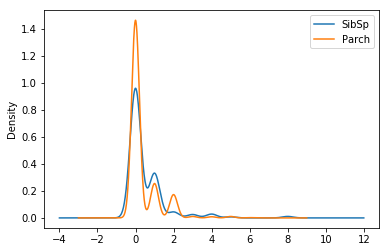

In [197]:
data_titanic[["SibSp", "Parch"]].plot.kde()

### 6. Какое самое популярное женское имя на корабле? Извлеките из полного имени пассажира (колонка Name) его личное имя (First Name). Попробуйте вручную разобрать несколько значений столбца Name и выработать правило для извлечения имен, а также разделения их на женские и мужские.

In [239]:
import re
print (data_titanic.query("Sex == 'female'")['Name']\
       .map(lambda string: re.sub(r'.+(Ms\.|Miss\.|Mrs\.) |".+"|\(".+"\)', '', string))\
       .map(lambda string: re.sub(r'.*\(|\)', '', string))\
       .value_counts().head())
print ("самое популярное имя Mary")

Mary          7
Anna          4
Bertha        4
Anna Sofia    3
Katherine     3
Name: Name, dtype: int64
самое популярное имя Mary


### 7. Коррелирует ли класс, которым ехал пассажир, с выживаемостью?

In [242]:
print (data_titanic[["Survived", "Pclass"]].corr())
print ("Значение проверочной статистики соответствует < 0.005, что подтверждает не случайность корреляции")

          Survived    Pclass
Survived  1.000000 -0.338481
Pclass   -0.338481  1.000000
Значение проверочной статистики соответствует < 0.005, что подтверждает не случайность корреляции


### 8. Визуализируйте гистограммы возраста для выживших и не выживших пассажиров. Сделайте выводы. Отобразите данные на одном и нескольких графиках.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017CFD065A90>]], dtype=object)

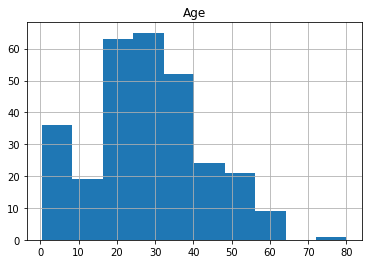

In [198]:
data_titanic[["Age"]].loc[data_titanic.Survived == True].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017CFD1D77F0>]], dtype=object)

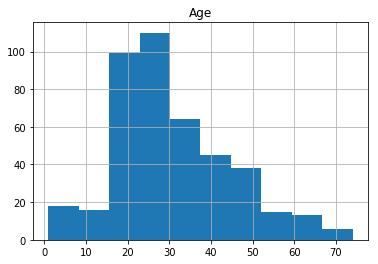

In [200]:
data_titanic[["Age"]].loc[data_titanic.Survived == False].hist()

Большинство выживших находится в пределах от 20 до 30. Детей и стариков выжило больше, чем умерло

### 9. Визуализируйте гистограммы возраста для выживших и не выживших пассажиров по классам. Сделайте выводы. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017CFE561EB8>]], dtype=object)

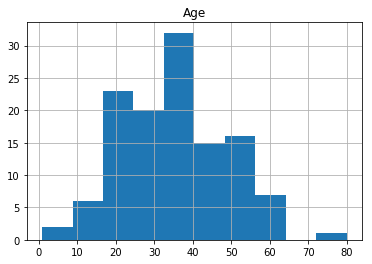

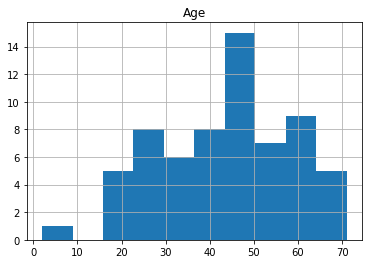

In [210]:
data_titanic.query('Survived == True and Pclass == 1')[['Age']].hist()
data_titanic.query('Survived == False and Pclass == 1')[['Age']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017CFE5812B0>]], dtype=object)

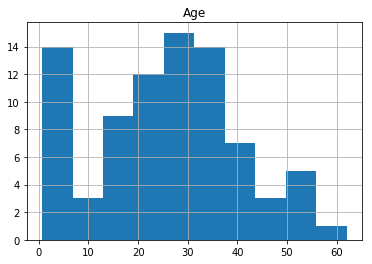

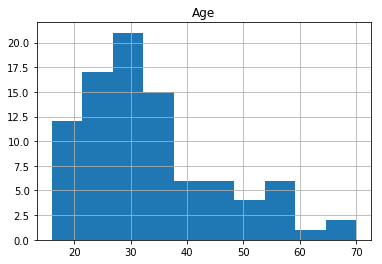

In [211]:
data_titanic.query('Survived == True and Pclass == 2')[['Age']].hist()
data_titanic.query('Survived == False and Pclass == 2')[['Age']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017CFED84C88>]], dtype=object)

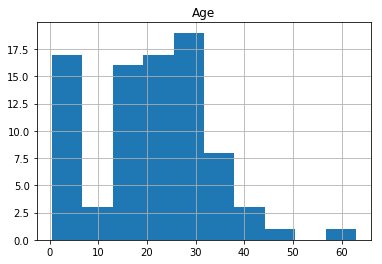

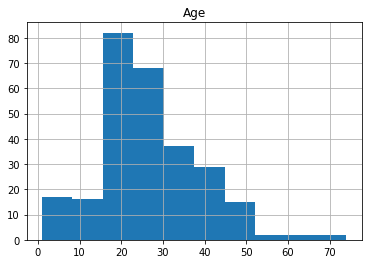

In [212]:
data_titanic.query('Survived == True and Pclass == 3')[['Age']].hist()
data_titanic.query('Survived == False and Pclass == 3')[['Age']].hist()

### 10. Постройте столбчатую диаграмму количества людей: мужчины, женщины, дети.

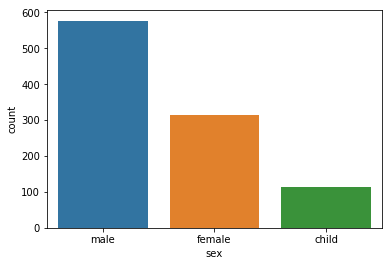

In [222]:
stolb = pd.DataFrame({'count': [len(data_titanic.loc[data_titanic.Sex == "male"]),len(data_titanic.loc[data_titanic.Sex == "female"]),len(data_titanic.query("Age < 18"))],
'sex': ["male","female","child"]})
sns.barplot(data=stolb, y='count', x='sex')